In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv("wine_data.csv")

In [3]:
a.head()

,Type,Alchohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
a.shape
a.info()
a.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Type                    178 non-null int64
Alchohol                178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_ash          178 non-null float64
magnesium               178 non-null int64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
OD280_OD315             178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


,Type,Alchohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
y = a["Type"]
X = a.drop("Type", axis = 1).values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234, stratify = y)

In [7]:
knn = KNeighborsClassifier(n_neighbors = 8)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [8]:
knn.score(X_test, y_test)

0.71111111111111114

In [9]:
neighbors = np.arange(1, 9)

test_arr = np.empty(len(neighbors))
train_arr = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(X_train, y_train)
    train_arr[i] = knn.score(X_train, y_train)
    test_arr[i] = knn.score(X_test, y_test)
    
print(train_arr)
print(test_arr)

[ 1.          0.84962406  0.82706767  0.78195489  0.78947368  0.78947368
  0.76691729  0.77443609]
[ 0.77777778  0.71111111  0.73333333  0.71111111  0.71111111  0.66666667
  0.75555556  0.71111111]


In [10]:
knn_pred = knn.predict(X_test)

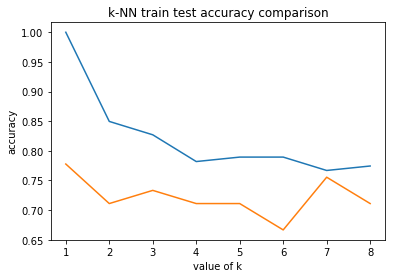

In [11]:
plt.title("k-NN train test accuracy comparison")
plt.plot(neighbors, train_arr, label = "train_accuracy")
plt.plot(neighbors, test_arr, label = "test_accuracy")
plt.xlabel('value of k')
plt.ylabel('accuracy')
plt.show()

In [18]:
" %d ", max(test_arr)

(' %d ', 0.77777777777777779)